In [1]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')

[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]
400.0 100.0 100.0 100.0 100.0 -2679.4919243112276
400.0 100.0 100.0 100.0 100.0 -2679.4919243112276
400.0 100.0 100.0 100.0 100.0 -6132.486540518714
400.0 100.0 100.0 100.0 100.0 -6132.486540518714
400.0 100.0 100.0 100.0 100.0 -7146.551844577316
400.0 100.0 100.0 100.0 100.0 -7146.551844577316
400.0 100.0 100.0 100.0 100.0 -7467.301994127108
400.0 100.0 100.0 100.0 100.0 -7467.301994127108
400.0 100.0 100.0 100.0 100.0 -7575.889284339277
400.0 100.0 100.0 100.0 100.0 -7575.889284339277
400.0 100.0 100.0 100.0 100.0 -7614.869337235954
400.0 100.0 100.0 100.0 100.0 -7614.869337235954
400.0 100.0 100.0 100.0 100.0 -7629.556464309522
400.0 100.0 100.0 100.0 100.0 -7629.556464309522
400.0 100.0 100.0 100.0 100.0 -7635.310662594269
400.0 100.0 100.0 100.0 100.0 -7635

400.0 100.0 100.0 100.0 100.0 -4427.54139139969
400.0 100.0 100.0 100.0 100.0 -10309.253188308352
400.0 100.0 100.0 100.0 100.0 -10529.043776790535
400.0 100.0 100.0 100.0 100.0 -12615.000328809285
400.0 100.0 100.0 100.0 100.0 -12890.090618583208
400.0 100.0 100.0 100.0 100.0 -13696.833233594225
400.0 100.0 100.0 100.0 100.0 -13886.598075065524
400.0 100.0 100.0 100.0 100.0 -14229.240975802717
400.0 100.0 100.0 100.0 100.0 -14344.450485521465
400.0 100.0 100.0 100.0 100.0 -14500.651860036107
400.0 100.0 100.0 100.0 100.0 -14566.727357508138
400.0 100.0 100.0 100.0 100.0 -14641.338079680332
400.0 100.0 100.0 100.0 100.0 -14678.037681447073
400.0 100.0 100.0 100.0 100.0 -14714.72312534553
400.0 100.0 100.0 100.0 100.0 -14734.69977022069
400.0 100.0 100.0 100.0 100.0 -14753.05599337081
400.0 100.0 100.0 100.0 100.0 -14763.782722738531
400.0 100.0 100.0 100.0 100.0 -14773.063950754016
400.0 100.0 100.0 100.0 100.0 -14778.768067759522
400.0 100.0 100.0 100.0 100.0 -14783.489782337252
400.0

400.0 100.0 100.0 100.0 100.0 -4552.802787019466
400.0 100.0 100.0 100.0 100.0 -10753.22818152658
400.0 100.0 100.0 100.0 100.0 -10901.619526358369
400.0 100.0 100.0 100.0 100.0 -13223.485495472003
400.0 100.0 100.0 100.0 100.0 -13491.286275378312
400.0 100.0 100.0 100.0 100.0 -14464.286102931761
400.0 100.0 100.0 100.0 100.0 -14684.47046260563
400.0 100.0 100.0 100.0 100.0 -15145.682259413657
400.0 100.0 100.0 100.0 100.0 -15304.764718992828
400.0 100.0 100.0 100.0 100.0 -15545.514909717058
400.0 100.0 100.0 100.0 100.0 -15654.251427752395
400.0 100.0 100.0 100.0 100.0 -15788.18870330804
400.0 100.0 100.0 100.0 100.0 -15860.03227940647
400.0 100.0 100.0 100.0 100.0 -15937.370007078314
400.0 100.0 100.0 100.0 100.0 -15983.675870394472
400.0 100.0 100.0 100.0 100.0 -16029.192504227876
400.0 100.0 100.0 100.0 100.0 -16058.449947002784
400.0 100.0 100.0 100.0 100.0 -16085.447335195502
400.0 100.0 100.0 100.0 100.0 -16103.624405951927
400.0 100.0 100.0 100.0 100.0 -16119.654380658221
400.0

400.0 100.0 100.0 100.0 100.0 -4578.500742527912
400.0 100.0 100.0 100.0 100.0 -10837.896650505661
400.0 100.0 100.0 100.0 100.0 -10985.31515226826
400.0 100.0 100.0 100.0 100.0 -13359.4603278969
400.0 100.0 100.0 100.0 100.0 -13642.6884492688
400.0 100.0 100.0 100.0 100.0 -14662.595514001077
400.0 100.0 100.0 100.0 100.0 -14908.343141585712
400.0 100.0 100.0 100.0 100.0 -15412.76303981934
400.0 100.0 100.0 100.0 100.0 -15602.436579315741
400.0 100.0 100.0 100.0 100.0 -15882.74913632138
400.0 100.0 100.0 100.0 100.0 -16022.946434296167
400.0 100.0 100.0 100.0 100.0 -16192.030923643677
400.0 100.0 100.0 100.0 100.0 -16293.224980220355
400.0 100.0 100.0 100.0 100.0 -16400.558496761052
400.0 100.0 100.0 100.0 100.0 -16472.351271277344
400.0 100.0 100.0 100.0 100.0 -16542.42584883104
400.0 100.0 100.0 100.0 100.0 -16592.602772520084
400.0 100.0 100.0 100.0 100.0 -16638.935661581156
400.0 100.0 100.0 100.0 100.0 -16673.51286519888
400.0 100.0 100.0 100.0 100.0 -16704.238519193903
400.0 100.

400.0 100.0 100.0 100.0 100.0 -4585.543651759027
400.0 100.0 100.0 100.0 100.0 -10860.734603796045
400.0 100.0 100.0 100.0 100.0 -11009.577461945217
400.0 100.0 100.0 100.0 100.0 -13399.274237326379
400.0 100.0 100.0 100.0 100.0 -13690.05160387827
400.0 100.0 100.0 100.0 100.0 -14726.226655785438
400.0 100.0 100.0 100.0 100.0 -14984.188023812061
400.0 100.0 100.0 100.0 100.0 -15506.212294725632
400.0 100.0 100.0 100.0 100.0 -15711.511943458363
400.0 100.0 100.0 100.0 100.0 -16010.65713619305
400.0 100.0 100.0 100.0 100.0 -16168.601994597691
400.0 100.0 100.0 100.0 100.0 -16357.114608924636
400.0 100.0 100.0 100.0 100.0 -16476.884707256755
400.0 100.0 100.0 100.0 100.0 -16603.376102200767
400.0 100.0 100.0 100.0 100.0 -16693.402828733037
400.0 100.0 100.0 100.0 100.0 -16781.51865626516
400.0 100.0 100.0 100.0 100.0 -16848.65756749351
400.0 100.0 100.0 100.0 100.0 -16911.25485911672
400.0 100.0 100.0 100.0 100.0 -16960.89733590161
400.0 100.0 100.0 100.0 100.0 -17005.71003451261
400.0 10

400.0 100.0 100.0 100.0 100.0 -17368.475603957566
400.0 100.0 100.0 100.0 100.0 -17342.8069246843
400.0 100.0 100.0 100.0 100.0 -17283.026768547614
400.0 100.0 100.0 100.0 100.0 -17141.254248707264
400.0 100.0 100.0 100.0 100.0 -16796.313093404035
400.0 100.0 100.0 100.0 100.0 -15927.735730399818
400.0 100.0 100.0 100.0 100.0 -16503.907967921696
400.0 100.0 100.0 100.0 100.0 -4587.81215323665
400.0 100.0 100.0 100.0 100.0 -10868.064161752915
400.0 100.0 100.0 100.0 100.0 -11017.674283249307
400.0 100.0 100.0 100.0 100.0 -13412.710171089719
400.0 100.0 100.0 100.0 100.0 -13706.691779246226
400.0 100.0 100.0 100.0 100.0 -14749.065767341785
400.0 100.0 100.0 100.0 100.0 -15012.429872880697
400.0 100.0 100.0 100.0 100.0 -15541.945622155472
400.0 100.0 100.0 100.0 100.0 -15754.665425155486
400.0 100.0 100.0 100.0 100.0 -16062.73584203935
400.0 100.0 100.0 100.0 100.0 -16229.847474546661
400.0 100.0 100.0 100.0 100.0 -16428.5886939542
400.0 100.0 100.0 100.0 100.0 -16558.874823371945
400.0 1

400.0 100.0 100.0 100.0 100.0 -4588.622254614417
400.0 100.0 100.0 100.0 100.0 -10870.680014262407
400.0 100.0 100.0 100.0 100.0 -11020.63587881959
400.0 100.0 100.0 100.0 100.0 -13417.670520046724
400.0 100.0 100.0 100.0 100.0 -13713.003562843633
400.0 100.0 100.0 100.0 100.0 -14757.87611935617
400.0 100.0 100.0 100.0 100.0 -15023.615318294243
400.0 100.0 100.0 100.0 100.0 -15556.400376899837
400.0 100.0 100.0 100.0 100.0 -15772.579279070118
400.0 100.0 100.0 100.0 100.0 -16084.865218025981
400.0 100.0 100.0 100.0 100.0 -16256.547693044371
400.0 100.0 100.0 100.0 100.0 -16460.51621260435
400.0 100.0 100.0 100.0 100.0 -16596.44127703258
400.0 100.0 100.0 100.0 100.0 -16740.316392798104
400.0 100.0 100.0 100.0 100.0 -16848.284520939676
400.0 100.0 100.0 100.0 100.0 -16955.09353078161
400.0 100.0 100.0 100.0 100.0 -17041.20310370458
400.0 100.0 100.0 100.0 100.0 -17123.064072530913
400.0 100.0 100.0 100.0 100.0 -17191.913301014843
400.0 100.0 100.0 100.0 100.0 -17255.81037250883
400.0 10

400.0 100.0 100.0 100.0 100.0 -4588.932945425855
400.0 100.0 100.0 100.0 100.0 -10871.68349642038
400.0 100.0 100.0 100.0 100.0 -11021.79145616492
400.0 100.0 100.0 100.0 100.0 -13419.620374370947
400.0 100.0 100.0 100.0 100.0 -13715.533419624717
400.0 100.0 100.0 100.0 100.0 -14761.454513242496
400.0 100.0 100.0 100.0 100.0 -15028.2491174415
400.0 100.0 100.0 100.0 100.0 -15562.490176054424
400.0 100.0 100.0 100.0 100.0 -15780.28025633089
400.0 100.0 100.0 100.0 100.0 -16094.560309566179
400.0 100.0 100.0 100.0 100.0 -16268.489518428654
400.0 100.0 100.0 100.0 100.0 -16475.086957614778
400.0 100.0 100.0 100.0 100.0 -16613.95011612
400.0 100.0 100.0 100.0 100.0 -16761.14047009762
400.0 100.0 100.0 100.0 100.0 -16872.752553280865
400.0 100.0 100.0 100.0 100.0 -16983.56085476055
400.0 100.0 100.0 100.0 100.0 -17073.983587879033
400.0 100.0 100.0 100.0 100.0 -17160.46917960549
400.0 100.0 100.0 100.0 100.0 -17234.21178965715
400.0 100.0 100.0 100.0 100.0 -17303.248405547874
400.0 100.0 10

400.0 100.0 100.0 100.0 100.0 -4589.0584941898705
400.0 100.0 100.0 100.0 100.0 -10872.089203031093
400.0 100.0 100.0 100.0 100.0 -11022.264525023107
400.0 100.0 100.0 100.0 100.0 -13420.423358142907
400.0 100.0 100.0 100.0 100.0 -13716.590685099512
400.0 100.0 100.0 100.0 100.0 -14762.965855939186
400.0 100.0 100.0 100.0 100.0 -15030.236513737309
400.0 100.0 100.0 100.0 100.0 -15565.137727780897
400.0 100.0 100.0 100.0 100.0 -15783.682635902182
400.0 100.0 100.0 100.0 100.0 -16098.910651797625
400.0 100.0 100.0 100.0 100.0 -16273.939257485836
400.0 100.0 100.0 100.0 100.0 -16481.848973894954
400.0 100.0 100.0 100.0 100.0 -16622.219629317195
400.0 100.0 100.0 100.0 100.0 -16771.15069789876
400.0 100.0 100.0 100.0 100.0 -16884.728913386818
400.0 100.0 100.0 100.0 100.0 -16997.749904016768
400.0 100.0 100.0 100.0 100.0 -17090.62541911746
400.0 100.0 100.0 100.0 100.0 -17179.81139680317
400.0 100.0 100.0 100.0 100.0 -17256.492026169282
400.0 100.0 100.0 100.0 100.0 -17328.70014555823
400.

400.0 100.0 100.0 100.0 100.0 -16479.417679677066
400.0 100.0 100.0 100.0 100.0 -17108.61118161701
400.0 100.0 100.0 100.0 100.0 -4589.111295334694
400.0 100.0 100.0 100.0 100.0 -10872.259923974618
400.0 100.0 100.0 100.0 100.0 -11022.465510469368
400.0 100.0 100.0 100.0 100.0 -13420.766163167042
400.0 100.0 100.0 100.0 100.0 -13717.047269632796
400.0 100.0 100.0 100.0 100.0 -14763.624158301393
400.0 100.0 100.0 100.0 100.0 -15031.112859627046
400.0 100.0 100.0 100.0 100.0 -15566.318221470858
400.0 100.0 100.0 100.0 100.0 -15785.219722160306
400.0 100.0 100.0 100.0 100.0 -16100.901413238127
400.0 100.0 100.0 100.0 100.0 -16276.468254007958
400.0 100.0 100.0 100.0 100.0 -16485.031451624454
400.0 100.0 100.0 100.0 100.0 -16626.169568455887
400.0 100.0 100.0 100.0 100.0 -16776.004283539572
400.0 100.0 100.0 100.0 100.0 -16890.626141067078
400.0 100.0 100.0 100.0 100.0 -17004.8467687761
400.0 100.0 100.0 100.0 100.0 -17099.082686344685
400.0 100.0 100.0 100.0 100.0 -17189.800240822246
400.

400.0 100.0 100.0 100.0 100.0 -17883.750938796897
400.0 100.0 100.0 100.0 100.0 -17497.298059410816
400.0 100.0 100.0 100.0 100.0 -16559.995647258314
400.0 100.0 100.0 100.0 100.0 -17194.956022096907
400.0 100.0 100.0 100.0 100.0 -4589.134213165238
400.0 100.0 100.0 100.0 100.0 -10872.334064541777
400.0 100.0 100.0 100.0 100.0 -11022.553461334588
400.0 100.0 100.0 100.0 100.0 -13420.916775674632
400.0 100.0 100.0 100.0 100.0 -13717.24973778355
400.0 100.0 100.0 100.0 100.0 -14763.918153146235
400.0 100.0 100.0 100.0 100.0 -15031.508173441029
400.0 100.0 100.0 100.0 100.0 -15566.855680994873
400.0 100.0 100.0 100.0 100.0 -15785.927179409073
400.0 100.0 100.0 100.0 100.0 -16101.827610281362
400.0 100.0 100.0 100.0 100.0 -16277.658767209025
400.0 100.0 100.0 100.0 100.0 -16486.54757343605
400.0 100.0 100.0 100.0 100.0 -16628.075098599526
400.0 100.0 100.0 100.0 100.0 -16778.375982473233
400.0 100.0 100.0 100.0 100.0 -16893.54630773049
400.0 100.0 100.0 100.0 100.0 -17008.40882412265
400.0

400.0 100.0 100.0 100.0 100.0 -17573.688369583564
400.0 100.0 100.0 100.0 100.0 -16628.8988938668
400.0 100.0 100.0 100.0 100.0 -17268.505031841407
400.0 100.0 100.0 100.0 100.0 -4589.1444179383725
400.0 100.0 100.0 100.0 100.0 -10872.3670945946
400.0 100.0 100.0 100.0 100.0 -11022.592887595802
400.0 100.0 100.0 100.0 100.0 -13420.984519139238
400.0 100.0 100.0 100.0 100.0 -13717.341501825253
400.0 100.0 100.0 100.0 100.0 -14764.052194826927
400.0 100.0 100.0 100.0 100.0 -15031.689918846469
400.0 100.0 100.0 100.0 100.0 -15567.104712393455
400.0 100.0 100.0 100.0 100.0 -15786.257989689502
400.0 100.0 100.0 100.0 100.0 -16102.264687399833
400.0 100.0 100.0 100.0 100.0 -16278.226212868894
400.0 100.0 100.0 100.0 100.0 -16487.277634167804
400.0 100.0 100.0 100.0 100.0 -16629.00261500416
400.0 100.0 100.0 100.0 100.0 -16779.543253483218
400.0 100.0 100.0 100.0 100.0 -16895.000119573084
400.0 100.0 100.0 100.0 100.0 -17010.203192885754
400.0 100.0 100.0 100.0 100.0 -17105.58123123832
400.0 

400.0 100.0 100.0 100.0 100.0 -18282.08726031596
400.0 100.0 100.0 100.0 100.0 -18205.7903456475
400.0 100.0 100.0 100.0 100.0 -18034.900578783778
400.0 100.0 100.0 100.0 100.0 -17639.94050152084
400.0 100.0 100.0 100.0 100.0 -16688.662653300875
400.0 100.0 100.0 100.0 100.0 -17332.110755919653
400.0 100.0 100.0 100.0 100.0 -4589.149058964742
400.0 100.0 100.0 100.0 100.0 -10872.382123422944
400.0 100.0 100.0 100.0 100.0 -11022.610919368024
400.0 100.0 100.0 100.0 100.0 -13421.015590806783
400.0 100.0 100.0 100.0 100.0 -13717.38386053522
400.0 100.0 100.0 100.0 100.0 -14764.114383187267
400.0 100.0 100.0 100.0 100.0 -15031.774835567085
400.0 100.0 100.0 100.0 100.0 -15567.221844602343
400.0 100.0 100.0 100.0 100.0 -15786.414803916474
400.0 100.0 100.0 100.0 100.0 -16102.47351021356
400.0 100.0 100.0 100.0 100.0 -16278.499657132335
400.0 100.0 100.0 100.0 100.0 -16487.632557195568
400.0 100.0 100.0 100.0 100.0 -16629.45775857027
400.0 100.0 100.0 100.0 100.0 -16780.121585445162
400.0 10

400.0 100.0 100.0 100.0 100.0 -4589.151207527883
400.0 100.0 100.0 100.0 100.0 -10872.38908401443
400.0 100.0 100.0 100.0 100.0 -11022.61930719253
400.0 100.0 100.0 100.0 100.0 -13421.030080124863
400.0 100.0 100.0 100.0 100.0 -13717.403720788781
400.0 100.0 100.0 100.0 100.0 -14764.143668154558
400.0 100.0 100.0 100.0 100.0 -15031.815065554016
400.0 100.0 100.0 100.0 100.0 -15567.277656994902
400.0 100.0 100.0 100.0 100.0 -15786.490028121701
400.0 100.0 100.0 100.0 100.0 -16102.574368099922
400.0 100.0 100.0 100.0 100.0 -16278.632712499104
400.0 100.0 100.0 100.0 100.0 -16487.806591772915
400.0 100.0 100.0 100.0 100.0 -16629.682760492313
400.0 100.0 100.0 100.0 100.0 -16780.40990578939
400.0 100.0 100.0 100.0 100.0 -16896.093583759663
400.0 100.0 100.0 100.0 100.0 -17011.57093361659
400.0 100.0 100.0 100.0 100.0 -17107.27718779845
400.0 100.0 100.0 100.0 100.0 -17199.70286866757
400.0 100.0 100.0 100.0 100.0 -17280.054866407474
400.0 100.0 100.0 100.0 100.0 -17356.392743481392
400.0 1

400.0 100.0 100.0 100.0 100.0 -17749.383566329452
400.0 100.0 100.0 100.0 100.0 -16787.417732524664
400.0 100.0 100.0 100.0 100.0 -17436.915284544884
400.0 100.0 100.0 100.0 100.0 -4589.152217413378
400.0 100.0 100.0 100.0 100.0 -10872.392356970016
400.0 100.0 100.0 100.0 100.0 -11022.623265980423
400.0 100.0 100.0 100.0 100.0 -13421.036933346171
400.0 100.0 100.0 100.0 100.0 -13717.413158427935
400.0 100.0 100.0 100.0 100.0 -14764.157637332992
400.0 100.0 100.0 100.0 100.0 -15031.834356178344
400.0 100.0 100.0 100.0 100.0 -15567.304554059805
400.0 100.0 100.0 100.0 100.0 -15786.526492848905
400.0 100.0 100.0 100.0 100.0 -16102.623551060713
400.0 100.0 100.0 100.0 100.0 -16278.6980204405
400.0 100.0 100.0 100.0 100.0 -16487.89259224862
400.0 100.0 100.0 100.0 100.0 -16629.79474610678
400.0 100.0 100.0 100.0 100.0 -16780.554476441335
400.0 100.0 100.0 100.0 100.0 -16896.278493141137
400.0 100.0 100.0 100.0 100.0 -17011.805500707396
400.0 100.0 100.0 100.0 100.0 -17107.572302088432
400.0

400.0 100.0 100.0 100.0 100.0 -18513.779301329356
400.0 100.0 100.0 100.0 100.0 -18515.140795819414
400.0 100.0 100.0 100.0 100.0 -18516.369801032797
400.0 100.0 100.0 100.0 100.0 -18517.473461670725
400.0 100.0 100.0 100.0 100.0 -18518.45485585443
400.0 100.0 100.0 100.0 100.0 -18519.30943525268
400.0 100.0 100.0 100.0 100.0 -18520.017713736677
400.0 100.0 100.0 100.0 100.0 -18520.530208390705
400.0 100.0 100.0 100.0 100.0 -18520.736288172622
400.0 100.0 100.0 100.0 100.0 -18520.39933538252
400.0 100.0 100.0 100.0 100.0 -18519.020644125805
400.0 100.0 100.0 100.0 100.0 -18515.550438594466
400.0 100.0 100.0 100.0 100.0 -18507.764737903075
400.0 100.0 100.0 100.0 100.0 -18490.89360920363
400.0 100.0 100.0 100.0 100.0 -18454.517593943747
400.0 100.0 100.0 100.0 100.0 -18375.29179443487
400.0 100.0 100.0 100.0 100.0 -18199.110839788358
400.0 100.0 100.0 100.0 100.0 -17795.001497432764
400.0 100.0 100.0 100.0 100.0 -16828.606828254357
400.0 100.0 100.0 100.0 100.0 -17480.563926565264
400.0

400.0 100.0 100.0 100.0 100.0 -18536.08638889678
400.0 100.0 100.0 100.0 100.0 -18499.426968513402
400.0 100.0 100.0 100.0 100.0 -18419.534420429867
400.0 100.0 100.0 100.0 100.0 -18242.05099135649
400.0 100.0 100.0 100.0 100.0 -17835.609413907478
400.0 100.0 100.0 100.0 100.0 -16865.297993674772
400.0 100.0 100.0 100.0 100.0 -17519.450680961992
400.0 100.0 100.0 100.0 100.0 -4589.152930017078
400.0 100.0 100.0 100.0 100.0 -10872.394667525663
400.0 100.0 100.0 100.0 100.0 -11022.62607232837
400.0 100.0 100.0 100.0 100.0 -13421.041803376376
400.0 100.0 100.0 100.0 100.0 -13717.419900249084
400.0 100.0 100.0 100.0 100.0 -14764.167659239589
400.0 100.0 100.0 100.0 100.0 -15031.848277689374
400.0 100.0 100.0 100.0 100.0 -15567.324075817953
400.0 100.0 100.0 100.0 100.0 -15786.553135156355
400.0 100.0 100.0 100.0 100.0 -16102.659731047901
400.0 100.0 100.0 100.0 100.0 -16278.74642115688
400.0 100.0 100.0 100.0 100.0 -16487.956824056873
400.0 100.0 100.0 100.0 100.0 -16629.87907735042
400.0 

400.0 100.0 100.0 100.0 100.0 -4589.153042741208
400.0 100.0 100.0 100.0 100.0 -10872.395033212208
400.0 100.0 100.0 100.0 100.0 -11022.626518443973
400.0 100.0 100.0 100.0 100.0 -13421.04257958055
400.0 100.0 100.0 100.0 100.0 -13717.420980803417
400.0 100.0 100.0 100.0 100.0 -14764.16927293838
400.0 100.0 100.0 100.0 100.0 -15031.850533451521
400.0 100.0 100.0 100.0 100.0 -15567.3272584053
400.0 100.0 100.0 100.0 100.0 -15786.557509583732
400.0 100.0 100.0 100.0 100.0 -16102.665715009429
400.0 100.0 100.0 100.0 100.0 -16278.754490481553
400.0 100.0 100.0 100.0 100.0 -16487.96762213429
400.0 100.0 100.0 100.0 100.0 -16629.893380230755
400.0 100.0 100.0 100.0 100.0 -16780.683080381583
400.0 100.0 100.0 100.0 100.0 -16896.444702229135
400.0 100.0 100.0 100.0 100.0 -17012.01863978481
400.0 100.0 100.0 100.0 100.0 -17107.84349307489
400.0 100.0 100.0 100.0 100.0 -17200.413845439743
400.0 100.0 100.0 100.0 100.0 -17280.94094626668
400.0 100.0 100.0 100.0 100.0 -17357.489335936873
400.0 100

400.0 100.0 100.0 100.0 100.0 -18637.475989889164
400.0 100.0 100.0 100.0 100.0 -18638.2159012609
400.0 100.0 100.0 100.0 100.0 -18637.78263949042
400.0 100.0 100.0 100.0 100.0 -18635.08325630721
400.0 100.0 100.0 100.0 100.0 -18627.815148649417
400.0 100.0 100.0 100.0 100.0 -18611.06839196924
400.0 100.0 100.0 100.0 100.0 -18574.179544445615
400.0 100.0 100.0 100.0 100.0 -18493.388806830582
400.0 100.0 100.0 100.0 100.0 -18313.908481383434
400.0 100.0 100.0 100.0 100.0 -17903.7017147575
400.0 100.0 100.0 100.0 100.0 -16926.916276125525
400.0 100.0 100.0 100.0 100.0 -17584.876525909807
400.0 100.0 100.0 100.0 100.0 -4589.153098081977
400.0 100.0 100.0 100.0 100.0 -10872.395212791042
400.0 100.0 100.0 100.0 100.0 -11022.626738006824
400.0 100.0 100.0 100.0 100.0 -13421.04296211413
400.0 100.0 100.0 100.0 100.0 -13717.421514838683
400.0 100.0 100.0 100.0 100.0 -14764.170072348723
400.0 100.0 100.0 100.0 100.0 -15031.85165452598
400.0 100.0 100.0 100.0 100.0 -15567.32884505831
400.0 100.0

400.0 100.0 100.0 100.0 100.0 -18665.070571473327
400.0 100.0 100.0 100.0 100.0 -18658.131227357146
400.0 100.0 100.0 100.0 100.0 -18641.602129503735
400.0 100.0 100.0 100.0 100.0 -18604.7537746289
400.0 100.0 100.0 100.0 100.0 -18523.714919715527
400.0 100.0 100.0 100.0 100.0 -18343.51567507111
400.0 100.0 100.0 100.0 100.0 -17931.836554605135
400.0 100.0 100.0 100.0 100.0 -16952.429694618153
400.0 100.0 100.0 100.0 100.0 -17612.065987191134
400.0 100.0 100.0 100.0 100.0 -4589.153125468569
400.0 100.0 100.0 100.0 100.0 -10872.395301681721
400.0 100.0 100.0 100.0 100.0 -11022.62684690602
400.0 100.0 100.0 100.0 100.0 -13421.043152073604
400.0 100.0 100.0 100.0 100.0 -13717.421780706532
400.0 100.0 100.0 100.0 100.0 -14764.170471180292
400.0 100.0 100.0 100.0 100.0 -15031.852215456569
400.0 100.0 100.0 100.0 100.0 -15567.329641190196
400.0 100.0 100.0 100.0 100.0 -15786.560800259896
400.0 100.0 100.0 100.0 100.0 -16102.670238545388
400.0 100.0 100.0 100.0 100.0 -16278.760623194717
400.0

400.0 100.0 100.0 100.0 100.0 -18692.5606005088
400.0 100.0 100.0 100.0 100.0 -18690.71162062258
400.0 100.0 100.0 100.0 100.0 -18684.15660349215
400.0 100.0 100.0 100.0 100.0 -18667.912445642633
400.0 100.0 100.0 100.0 100.0 -18631.19018578041
400.0 100.0 100.0 100.0 100.0 -18550.01884273873
400.0 100.0 100.0 100.0 100.0 -18369.266157447386
400.0 100.0 100.0 100.0 100.0 -17956.361616724113
400.0 100.0 100.0 100.0 100.0 -16974.707002738487
400.0 100.0 100.0 100.0 100.0 -17635.889246651255
400.0 100.0 100.0 100.0 100.0 -4589.153139118959
400.0 100.0 100.0 100.0 100.0 -10872.395345997975
400.0 100.0 100.0 100.0 100.0 -11022.626901294989
400.0 100.0 100.0 100.0 100.0 -13421.043247051817
400.0 100.0 100.0 100.0 100.0 -13717.421913944072
400.0 100.0 100.0 100.0 100.0 -14764.170671437485
400.0 100.0 100.0 100.0 100.0 -15031.852497842865
400.0 100.0 100.0 100.0 100.0 -15567.330043012647
400.0 100.0 100.0 100.0 100.0 -15786.561358060693
400.0 100.0 100.0 100.0 100.0 -16102.671009434322
400.0 1

400.0 100.0 100.0 100.0 100.0 -4589.15314596701
400.0 100.0 100.0 100.0 100.0 -10872.395368235026
400.0 100.0 100.0 100.0 100.0 -11022.626928630743
400.0 100.0 100.0 100.0 100.0 -13421.043294835437
400.0 100.0 100.0 100.0 100.0 -13717.42198111594
400.0 100.0 100.0 100.0 100.0 -14764.17077257502
400.0 100.0 100.0 100.0 100.0 -15031.852640798406
400.0 100.0 100.0 100.0 100.0 -15567.330246908177
400.0 100.0 100.0 100.0 100.0 -15786.561641873632
400.0 100.0 100.0 100.0 100.0 -16102.671402773398
400.0 100.0 100.0 100.0 100.0 -16278.762212480497
400.0 100.0 100.0 100.0 100.0 -16487.97802899344
400.0 100.0 100.0 100.0 100.0 -16629.907269666634
400.0 100.0 100.0 100.0 100.0 -16780.701478674135
400.0 100.0 100.0 100.0 100.0 -16896.468878314674
400.0 100.0 100.0 100.0 100.0 -17012.05018227174
400.0 100.0 100.0 100.0 100.0 -17107.88435477624
400.0 100.0 100.0 100.0 100.0 -17200.46642773889
400.0 100.0 100.0 100.0 100.0 -17281.008170856177
400.0 100.0 100.0 100.0 100.0 -17357.57474420008
400.0 100

400.0 100.0 100.0 100.0 100.0 -18710.23133139241
400.0 100.0 100.0 100.0 100.0 -18714.907284434754
400.0 100.0 100.0 100.0 100.0 -18719.294834838358
400.0 100.0 100.0 100.0 100.0 -18723.3340742965
400.0 100.0 100.0 100.0 100.0 -18726.897699733527
400.0 100.0 100.0 100.0 100.0 -18729.72066097175
400.0 100.0 100.0 100.0 100.0 -18731.25434164445
400.0 100.0 100.0 100.0 100.0 -18730.3606315225
400.0 100.0 100.0 100.0 100.0 -18724.659654914605
400.0 100.0 100.0 100.0 100.0 -18709.108899709892
400.0 100.0 100.0 100.0 100.0 -18672.819176165765
400.0 100.0 100.0 100.0 100.0 -18591.65287805334
400.0 100.0 100.0 100.0 100.0 -18410.208385360253
400.0 100.0 100.0 100.0 100.0 -17995.501161950848
400.0 100.0 100.0 100.0 100.0 -17010.35808179636
400.0 100.0 100.0 100.0 100.0 -17674.25659944325
400.0 100.0 100.0 100.0 100.0 -4589.153149422789
400.0 100.0 100.0 100.0 100.0 -10872.395379458867
400.0 100.0 100.0 100.0 100.0 -11022.626942448524
400.0 100.0 100.0 100.0 100.0 -13421.043319011427
400.0 100.0

400.0 100.0 100.0 100.0 100.0 -18745.12705741026
400.0 100.0 100.0 100.0 100.0 -18739.854986432096
400.0 100.0 100.0 100.0 100.0 -18724.672019981917
400.0 100.0 100.0 100.0 100.0 -18688.64779625923
400.0 100.0 100.0 100.0 100.0 -18607.576875951287
400.0 100.0 100.0 100.0 100.0 -18425.94880601071
400.0 100.0 100.0 100.0 100.0 -18010.612857153516
400.0 100.0 100.0 100.0 100.0 -17024.166474581303
400.0 100.0 100.0 100.0 100.0 -17689.232469399412
400.0 100.0 100.0 100.0 100.0 -4589.153151176098
400.0 100.0 100.0 100.0 100.0 -10872.395385154385
400.0 100.0 100.0 100.0 100.0 -11022.626949469828
400.0 100.0 100.0 100.0 100.0 -13421.043331306457
400.0 100.0 100.0 100.0 100.0 -13717.422032512939
400.0 100.0 100.0 100.0 100.0 -14764.170850124308
400.0 100.0 100.0 100.0 100.0 -15031.852750725051
400.0 100.0 100.0 100.0 100.0 -15567.330404135897
400.0 100.0 100.0 100.0 100.0 -15786.5618614415
400.0 100.0 100.0 100.0 100.0 -16102.67170810582
400.0 100.0 100.0 100.0 100.0 -16278.762631689726
400.0 1

400.0 100.0 100.0 100.0 100.0 -18754.577300642282
400.0 100.0 100.0 100.0 100.0 -18757.047726454184
400.0 100.0 100.0 100.0 100.0 -18757.05420479052
400.0 100.0 100.0 100.0 100.0 -18752.189191455724
400.0 100.0 100.0 100.0 100.0 -18737.36409787328
400.0 100.0 100.0 100.0 100.0 -18701.61305464471
400.0 100.0 100.0 100.0 100.0 -18620.672420661504
400.0 100.0 100.0 100.0 100.0 -18438.938799089243
400.0 100.0 100.0 100.0 100.0 -18023.120138427024
400.0 100.0 100.0 100.0 100.0 -17035.61955810191
400.0 100.0 100.0 100.0 100.0 -17701.72281977572
400.0 100.0 100.0 100.0 100.0 -4589.153152070037
400.0 100.0 100.0 100.0 100.0 -10872.395388058787
400.0 100.0 100.0 100.0 100.0 -11022.626953054762
400.0 100.0 100.0 100.0 100.0 -13421.043337588924
400.0 100.0 100.0 100.0 100.0 -13717.422041390986
400.0 100.0 100.0 100.0 100.0 -14764.170863551146
400.0 100.0 100.0 100.0 100.0 -15031.852769817822
400.0 100.0 100.0 100.0 100.0 -15567.330431529459
400.0 100.0 100.0 100.0 100.0 -15786.561899834935
400.0 

400.0 100.0 100.0 100.0 100.0 -18724.225400765972
400.0 100.0 100.0 100.0 100.0 -18730.71932184682
400.0 100.0 100.0 100.0 100.0 -18736.983211033774
400.0 100.0 100.0 100.0 100.0 -18743.003259925637
400.0 100.0 100.0 100.0 100.0 -18748.748705090664
400.0 100.0 100.0 100.0 100.0 -18754.154646057337
400.0 100.0 100.0 100.0 100.0 -18759.087092316004
400.0 100.0 100.0 100.0 100.0 -18763.271372774325
400.0 100.0 100.0 100.0 100.0 -18766.14415238679
400.0 100.0 100.0 100.0 100.0 -18766.543775629143
400.0 100.0 100.0 100.0 100.0 -18762.051675706134
400.0 100.0 100.0 100.0 100.0 -18747.5610190485
400.0 100.0 100.0 100.0 100.0 -18712.0757845454
400.0 100.0 100.0 100.0 100.0 -18631.283122076115
400.0 100.0 100.0 100.0 100.0 -18449.50139047904
400.0 100.0 100.0 100.0 100.0 -18033.320059665857
400.0 100.0 100.0 100.0 100.0 -17044.97997269512
400.0 100.0 100.0 100.0 100.0 -17711.990133808104
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]
 [0.00000

<IPython.core.display.Javascript object>


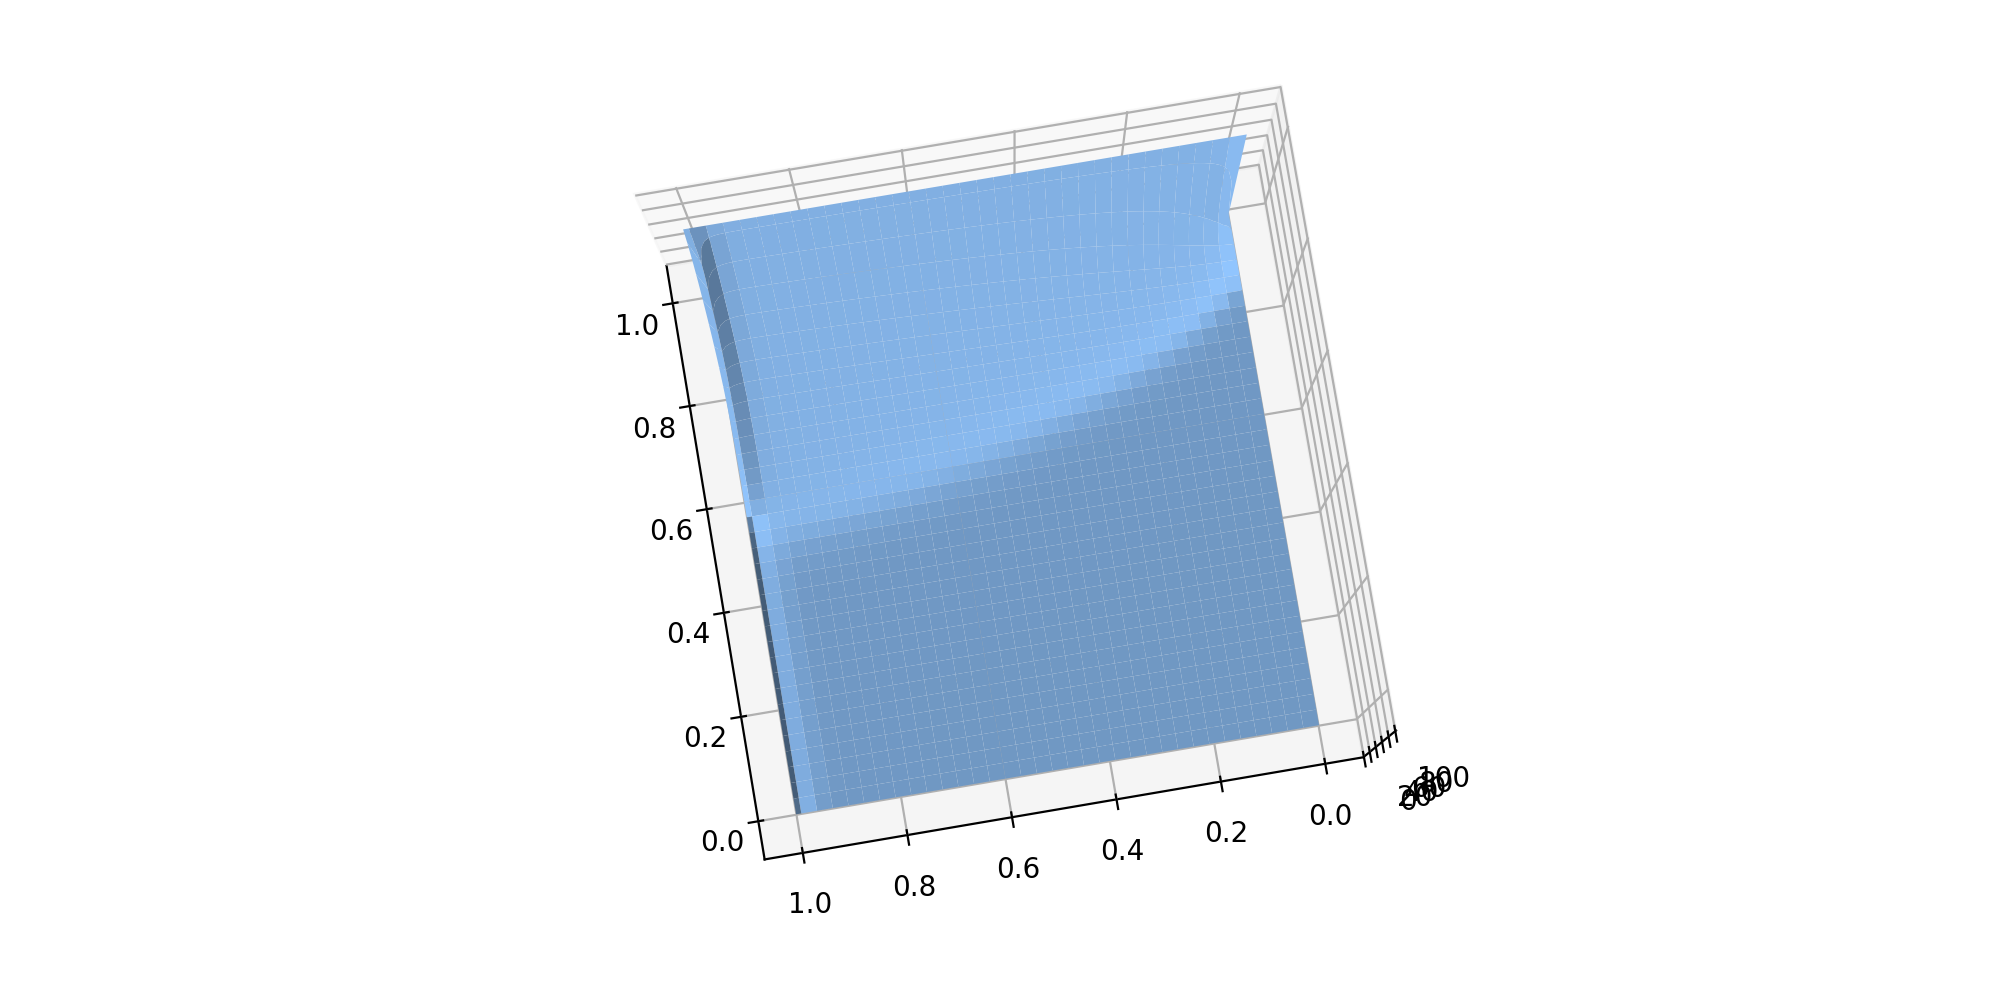

In [16]:
lambd = 100
#f0 = 10
q = 1000
L_x = 1
L_y = 1
m = 100
n = 100
h_x = L_x / m
h_y = L_y / n
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)
r_i = len(x_i)
r_j = len(y_j)
g_y_x = np.zeros([r_j, r_i]) #сетка размером r_j * r_i
Temp = 100
for i in range(r_i): #гран условие при y = 0
    g_y_x[0][i] = 0
for j in range(r_j): #гран условие при x = X
    g_y_x[j][r_i-1] = Temp
for i in range(r_i):
    for j in range(r_j):
        g_y_x[j][i] += 0
print(g_y_x)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])
alph2 = np.zeros([r_j-1])
beta2 = np.zeros([r_j-1])
#задаем f
def f0(c, x, y, T):
    return c * (1 + x * y * (T + 10))
#задаем лямбду
def lambd_x_y(lambd, x, y):
    return lambd #* (1 + x ** 2 * y)
def lambd_m_plus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y + h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y + h_y)))
def lambd_m_minus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y - h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y - h_y)))
def lambd_n_plus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x + h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x + h_x, y)))
def lambd_n_minus(lambd, x, y):
    return (2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x - h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x - h_x, y)))
#задаем беты
def beta_N(lambd, x, y):
    return lambd_m_plus(lambd, x, y) * h_x / h_y
def beta_S(lambd, x, y):
    return lambd_m_minus(lambd, x, y) * h_x / h_y
def beta_W(lambd, x, y):
    return lambd_n_minus(lambd, x, y) * h_y / h_x
def beta_E(lambd, x, y):
    return lambd_n_plus(lambd, x, y) * h_y / h_x
def beta_P(lambd, x, y):
    return beta_N(lambd, x, y) + beta_S(lambd, x, y) + beta_W(lambd, x, y) + beta_S(lambd, x, y)
for s in range(50):
    # продольная прогонка
    for j in range(1,r_j-1):
        #beta_N = lambd * h_x / h_y
        #beta_W = lambd * h_y / h_x
        #beta_S = lambd * h_x / h_y
        #beta_E = lambd * h_y / h_x
        #beta_P = beta_E + beta_N + beta_S + beta_W
        #нет потока и нулевая температура
        alph1[0] = 1
        beta1[0] = 0
        for i in range(1,r_i-1):
            alph1[i] = -beta_E(lambd, x_i[i], y_j[j]) / (beta_W(lambd, x_i[i], y_j[j]) * alph1[i - 1] - beta_P(lambd, x_i[i], y_j[j]))
            beta1[i] = (-f0(0, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y -beta_N(lambd, x_i[i], y_j[j])*g_y_x[j+1][i] - beta_S(lambd, x_i[i], y_j[j]) * g_y_x[j-1][i] - beta_W(lambd, x_i[i], y_j[j]) * beta1[i-1]) / (beta_W(lambd, x_i[i], y_j[j]) * alph1[i - 1] - beta_P(lambd, x_i[i], y_j[j]))
        for m in range(r_i - 2, -1, -1):
            g_y_x[j+1][m] = g_y_x[j+1][m + 1] * alph1[m] + beta1[m]
        print(beta_P(lambd, x_i[i], y_j[j]),beta_N(lambd, x_i[i], y_j[j]), beta_S(lambd, x_i[i], y_j[j]),beta_E(lambd, x_i[i], y_j[j]), beta_W(lambd, x_i[i], y_j[j]), -f0(0, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y -beta_N(lambd, x_i[i], y_j[j])*g_y_x[j+1][i] - beta_S(lambd, x_i[i], y_j[j]) * g_y_x[j-1][i] )
    # поперечная прогонка   
    for i in range(1,r_i-1):
        alph2[0] = 0
        beta2[0] = 0
        for j in range(1,r_j-2):
            alph2[j] = -beta_N(lambd, x_i[i], y_j[j]) / (beta_S(lambd, x_i[i], y_j[j]) * alph2[j - 1] - beta_P(lambd, x_i[i],y_j[j]))
            beta2[j] = (-f0(0, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y -beta_E(lambd, x_i[i], y_j[j])*g_y_x[j][i + 1] - beta_W(lambd, x_i[i], y_j[j]) * g_y_x[j][i - 1] - beta_S(lambd, x_i[i], y_j[j]) * beta2[j-1]) / (beta_S(lambd, x_i[i], y_j[j]) * alph2[j - 1] - beta_P(lambd, x_i[i], y_j[j]))
        g_y_x[r_j-2][i] =  (-f0(0, x_i[i], y_j[j], g_y_x[j][i]) * h_x * h_y - beta_E(lambd, x_i[i], y_j[j])*g_y_x[j][i + 1] - beta_W(lambd, x_i[i], y_j[j]) * g_y_x[j][i - 1] - beta_S(lambd, x_i[i], y_j[j]) * q * h_y / lambd_x_y(lambd, x_i[i], y_j[j])) / (beta_S(lambd, x_i[i], y_j[j]) - beta_P(lambd, x_i[i], y_j[j]))
        for m in range(r_j - 3, -1, -1):
            g_y_x[m][i] = g_y_x[m+1][i] * alph2[m] + beta2[m]
    

    
print(g_y_x)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
axes.plot_surface(xgrid, ygrid, g_y_x)
plt.show() 